In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium as g

%matplotlib inline

from datetime import date,datetime,timedelta
from dateutil.parser import parse

import json

from glob import glob

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 문제 해결
rc('font', family='AppleGothic')

# 차트 축 <- 음수 부호 지원
plt.rcParams['axes.unicode_minus'] = False

In [59]:
# [실습01]
# 지역으로 시작하는 모든 파일을 로드하고 병합
files = glob('/Users/iganghui/TIL/Python/Python_data_science/Data/지역*.xls')

temp_list = []
for file in files:
    temp = pd.read_excel(file,header=2)
    temp_list.append(temp)
    
data = pd.concat(temp_list)
display(data)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),현대오일뱅크,02-955-5185,N,-,1502,1284,930
1,서울특별시,삼미상사(주)북부주유소,서울 도봉구 도봉로 437 (쌍문동),SK에너지,02-991-5561,Y,-,1504,1289,1200
2,서울특별시,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),SK에너지,02-996-5151,Y,-,1504,1289,-
3,서울특별시,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),현대오일뱅크,02-902-5189,N,-,1504,1280,-
4,서울특별시,쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),S-OIL,02-992-0220,Y,-,1504,1284,1000
...,...,...,...,...,...,...,...,...,...,...
7,서울특별시,대성산업(주) 노량진주유소,서울 동작구 노량진로 172 (노량진동),GS칼텍스,02-815-2354,N,-,1557,1357,899
8,서울특별시,현대오일뱅크 동작주유소,서울특별시 동작구 상도로 403 (상도동),현대오일뱅크,02-817-9179,N,-,1578,1368,1000
9,서울특별시,살피재주유소,서울특별시 동작구 상도로 334 (상도동),SK에너지,02-817-2559,N,-,1595,1385,-
10,서울특별시,흑석동,서울 동작구 현충로 101 (흑석동),SK에너지,02-815-0724,Y,-,1598,1488,-


In [60]:
data.replace('-',np.nan).isna().sum()

지역         0
상호         0
주소         0
상표         0
전화번호       0
셀프여부       0
고급휘발유    334
휘발유        4
경유         4
실내등유     242
dtype: int64

In [61]:
# [실습03]
# 휘발유를 대상으로 분석 진행하기위해서 컬럼명 변경하여 서브셋 만들기
subset_df = data.filter(['상호','주소','휘발유','셀프여부','상표'])
subset_df.columns = [ 'oil_store' , 'address' , 'price' , 'self_y_n' , 'company']
display(subset_df)

,oil_store,address,price,self_y_n,company
0,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1502,N,현대오일뱅크
1,삼미상사(주)북부주유소,서울 도봉구 도봉로 437 (쌍문동),1504,Y,SK에너지
2,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),1504,Y,SK에너지
3,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),1504,N,현대오일뱅크
4,쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1504,Y,S-OIL
...,...,...,...,...,...
7,대성산업(주) 노량진주유소,서울 동작구 노량진로 172 (노량진동),1557,N,GS칼텍스
8,현대오일뱅크 동작주유소,서울특별시 동작구 상도로 403 (상도동),1578,N,현대오일뱅크
9,살피재주유소,서울특별시 동작구 상도로 334 (상도동),1595,N,SK에너지
10,흑석동,서울 동작구 현충로 101 (흑석동),1598,Y,SK에너지


In [62]:
# [실습04]
# 구별 주유소 가격을 조사하기 위해서 파생변수 생성(direct)
# 구별 정보확인
# 서울특별시 -> 성동구 대체
# 특별시 -> 도봉구 대체
# subset_df['direct']
subset_df['direct'] = subset_df['address'].str.split().str[1]
subset_df['direct'].replace({'서울특별시':'성동구','특별시':'동붕구'},inplace=True)

In [63]:
# [실습05]
# 가격 정보 확인[ - 들어있음] 후
# 가격 정보가 기입되지 않은 주유소는 제거
# 컬럼 타입을 숫자형으로 변경
subset_df['price'].replace('-',np.nan,inplace=True)

subset_df.dropna(axis=0,inplace=True)
subset_df['price'] = subset_df['price'].astype(int)
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   oil_store  487 non-null    object
 1   address    487 non-null    object
 2   price      487 non-null    int64 
 3   self_y_n   487 non-null    object
 4   company    487 non-null    object
 5   direct     487 non-null    object
dtypes: int64(1), object(5)
memory usage: 26.6+ KB


In [95]:
subset_df.to_excel('/Users/iganghui/TIL/test.xlsx')

In [64]:
# [실습06]
# 인덱스를 새롭게 정의(reset_index)
# 인덱스열을 제거
subset_df.reset_index(inplace=True)
subset_df.drop('index',axis=1,inplace=True)
subset_df

,oil_store,address,price,self_y_n,company,direct
0,도봉제일주유소(주)송만에너지,서울특별시 도봉구 도봉로 783 (도봉동),1502,N,현대오일뱅크,도봉구
1,삼미상사(주)북부주유소,서울 도봉구 도봉로 437 (쌍문동),1504,Y,SK에너지,도봉구
2,정다운셀프주유소,서울특별시 도봉구 도봉로 635 (쌍문동),1504,Y,SK에너지,도봉구
3,한이에너지(주)KLP제1주유소,서울특별시 도봉구 도봉로 596 (창동),1504,N,현대오일뱅크,도봉구
4,쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1504,Y,S-OIL,도봉구
...,...,...,...,...,...,...
482,대성산업(주) 노량진주유소,서울 동작구 노량진로 172 (노량진동),1557,N,GS칼텍스,동작구
483,현대오일뱅크 동작주유소,서울특별시 동작구 상도로 403 (상도동),1578,N,현대오일뱅크,동작구
484,살피재주유소,서울특별시 동작구 상도로 334 (상도동),1595,N,SK에너지,동작구
485,흑석동,서울 동작구 현충로 101 (흑석동),1598,Y,SK에너지,동작구


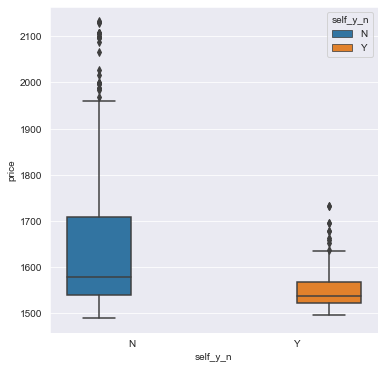

In [89]:
# [실습07]
# 박스플롯을 이용한 셀프여부 비교 시각화(휘발유 가격차이 확인)
fig = plt.figure(figsize=(20,6))
sns.set_style('darkgrid')
area01 = fig.add_subplot(1,3,1)

sns.boxplot(ax=area01,x='self_y_n',y='price',hue='self_y_n',data=subset_df)
plt.show()
plt.close()

In [70]:
# [실습08]
# 구별 휘발유 평균가격 확인
display(subset_df.groupby('direct')[['price']].mean())
display(subset_df.groupby('company')[['price']].mean())

,price
direct,
강동구,1656.722222
강북구,1534.333333
강서구,1576.428571
관악구,1603.055556
광진구,1569.333333
구로구,1597.227273
금천구,1616.642857
노원구,1606.000000
도봉구,1555.368421


,price
company,
GS칼텍스,1604.572519
NH-OIL,1549.000000
S-OIL,1581.835616
SK에너지,1689.492147
알뜰(ex),1490.000000
알뜰주유소,1514.090909
자가상표,1552.200000
현대오일뱅크,1569.364865


In [126]:
seoul_map = g.Map(location=[37.53,126.97],
            zoom_start=10,
            tiles='Stamen Terrain')

In [125]:
# [실습09]
# 구분구획선(Choropleth) 이용한 시각화
geom_json = json.load(open('/Users/iganghui/TIL/Python/Python_data_science/Data/korea_municipalities_geo_simple.json'))
geom_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [127]:
g.Choropleth(geo_data = geom_json,
             key_on   ='feature.properties.name').add_to(seoul_map)

In [116]:
# [실습10]
# 제공된 json 파일을 이용하여 구분구획선 지도 시각화 준비
# 서울지역 주유가격 상위 10, 하위 10 확인
# googlemap을 이용한 위도경도 추출
# 데이터에 위도, 경도 추가하여
# 주유가격 상위 10, 하위 10 개 folium marker를 이용한 시각화

In [107]:
top_bottom_10 = pd.concat([subset_df.sort_values('price').head(),subset_df.sort_values('price').tail()])
top_bottom_10

,oil_store,address,price,self_y_n,company,direct
191,만남의광장주유소,서울 서초구 양재대로12길 73-71 (원지동),1490,N,알뜰(ex),서초구
105,태릉솔밭주유소,서울특별시 노원구 노원로 49 (공릉동),1497,Y,S-OIL,노원구
121,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1497,Y,SK에너지,강서구
296,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1498,Y,GS칼텍스,강북구
453,풀페이주유소,서울특별시 구로구 경인로 41 (온수동),1499,N,SK에너지,구로구
321,강변주유소,서울특별시 용산구 원효로 9 (청암동),2106,N,SK에너지,용산구
260,통일주유소,서울 중구 동호로 296 (장충동2가),2106,N,SK에너지,중구
232,양재주유소,서울 서초구 바우뫼로 178 (양재동),2128,N,SK에너지,서초구
261,장충주유소,서울 중구 장충단로 202 (장충동1가),2130,N,SK에너지,중구
262,서남주유소,서울 중구 통일로 30 (봉래동1가),2132,N,SK에너지,중구


In [137]:
import googlemaps
maps = googlemaps.Client(key=open('/Users/iganghui/TIL/Python/Python_data_science/Data/googlekey.txt').readline())
locations = top_bottom_10['address'].apply(lambda x: maps.geocode(x)[0].get('geometry')['location'])
locations

191    {'lat': 37.4599063, 'lng': 127.0420601}
105    {'lat': 37.6259181, 'lng': 127.0855335}
121    {'lat': 37.5552839, 'lng': 126.7685674}
296    {'lat': 37.6421401, 'lng': 127.0295678}
453    {'lat': 37.4899652, 'lng': 126.8254874}
321    {'lat': 37.5346046, 'lng': 126.9487786}
260    {'lat': 37.5607136, 'lng': 127.0031771}
232      {'lat': 37.4780706, 'lng': 127.03961}
261    {'lat': 37.5608027, 'lng': 127.0076024}
262    {'lat': 37.5591119, 'lng': 126.9724911}
Name: address, dtype: object

In [129]:
# 지도에 10개의 주유소 마커 추가
for name,location in zip(top_bottom_10['oil_store'],locations):
    g.Marker([location['lat'],location['lng']],popup=name,icon=g.Icon(color='red')).add_to(seoul_map)
seoul_map